In [2]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

note:for solving this project i only could use 3 algorithms(svm,dts,rf)

In [3]:
#import our dataset
data=pd.read_csv('D:/python/data set/train_mobile.csv')
data_test=pd.read_csv('D:/python/data set/test_mobile.csv')
data_test.drop('id',axis=1,inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df_mobile=pd.DataFrame(data)
df_mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df_mobile.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
#wrong features.
df_mobile.drop('sc_w',axis=1,inplace=True)
df_mobile.drop('m_dep',axis=1,inplace=True)

In [6]:
df_mobile[df_mobile['px_height']<129].index.values
#the first mobile with a screen was ibm simon that has a pixel = 240*129
#so its imposible to have a mobile data with pixel height and width lower than this!

array([   0,   32,   47,   59,   67,   73,   86,  105,  112,  113,  124,
        160,  169,  184,  197,  213,  217,  223,  245,  252,  276,  289,
        295,  301,  310,  315,  318,  322,  334,  338,  347,  350,  373,
        376,  377,  383,  385,  386,  396,  397,  407,  421,  424,  434,
        468,  497,  505,  529,  561,  566,  571,  606,  608,  639,  644,
        650,  652,  654,  657,  688,  695,  698,  710,  711,  726,  730,
        734,  757,  762,  780,  786,  791,  797,  801,  807,  818,  847,
        849,  861,  868,  870,  912,  917,  925,  927,  930,  935,  938,
        946,  962,  970,  973,  977,  980,  994, 1028, 1029, 1056, 1063,
       1078, 1082, 1099, 1104, 1105, 1110, 1121, 1146, 1166, 1167, 1189,
       1200, 1210, 1236, 1255, 1258, 1276, 1282, 1305, 1313, 1314, 1318,
       1328, 1348, 1354, 1367, 1388, 1389, 1394, 1401, 1405, 1432, 1439,
       1440, 1441, 1442, 1444, 1453, 1467, 1481, 1491, 1498, 1500, 1502,
       1506, 1510, 1516, 1519, 1530, 1536, 1538, 15

In [7]:
df_mobile.drop([   0,   32,   47,   59,   67,   73,   86,  105,  112,  113,  124,
        160,  169,  184,  197,  213,  217,  223,  245,  252,  276,  289,
        295,  301,  310,  315,  318,  322,  334,  338,  347,  350,  373,
        376,  377,  383,  385,  386,  396,  397,  407,  421,  424,  434,
        468,  497,  505,  529,  561,  566,  571,  606,  608,  639,  644,
        650,  652,  654,  657,  688,  695,  698,  710,  711,  726,  730,
        734,  757,  762,  780,  786,  791,  797,  801,  807,  818,  847,
        849,  861,  868,  870,  912,  917,  925,  927,  930,  935,  938,
        946,  962,  970,  973,  977,  980,  994, 1028, 1029, 1056, 1063,
       1078, 1082, 1099, 1104, 1105, 1110, 1121, 1146, 1166, 1167, 1189,
       1200, 1210, 1236, 1255, 1258, 1276, 1282, 1305, 1313, 1314, 1318,
       1328, 1348, 1354, 1367, 1388, 1389, 1394, 1401, 1405, 1432, 1439,
       1440, 1441, 1442, 1444, 1453, 1467, 1481, 1491, 1498, 1500, 1502,
       1506, 1510, 1516, 1519, 1530, 1536, 1538, 1540, 1553, 1557, 1572,
       1573, 1579, 1596, 1597, 1603, 1612, 1626, 1635, 1641, 1643, 1644,
       1660, 1671, 1672, 1686, 1707, 1714, 1720, 1723, 1727, 1731, 1745,
       1751, 1754, 1762, 1772, 1775, 1791, 1793, 1795, 1799, 1807, 1814,
       1815, 1845, 1847, 1849, 1861, 1875, 1878, 1891, 1892, 1900, 1907,
       1914, 1922, 1933, 1948, 1949, 1954, 1963, 1972, 1991],inplace=True)

In [8]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 1 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1793 non-null   int64  
 1   blue           1793 non-null   int64  
 2   clock_speed    1793 non-null   float64
 3   dual_sim       1793 non-null   int64  
 4   fc             1793 non-null   int64  
 5   four_g         1793 non-null   int64  
 6   int_memory     1793 non-null   int64  
 7   mobile_wt      1793 non-null   int64  
 8   n_cores        1793 non-null   int64  
 9   pc             1793 non-null   int64  
 10  px_height      1793 non-null   int64  
 11  px_width       1793 non-null   int64  
 12  ram            1793 non-null   int64  
 13  sc_h           1793 non-null   int64  
 14  talk_time      1793 non-null   int64  
 15  three_g        1793 non-null   int64  
 16  touch_screen   1793 non-null   int64  
 17  wifi           1793 non-null   int64  
 18  price_ra

In [9]:
df_mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,1243.819855,0.491913,1.526715,0.506414,4.272727,0.514780,31.944228,140.469604,4.51478,9.920803,711.489682,1270.599554,2115.082543,12.328500,11.020078,0.758505,0.505298,0.513664,1.518126
std,440.771214,0.500074,0.817331,0.500098,4.348108,0.499921,18.001619,35.521251,2.27955,6.085365,420.630798,427.280502,1083.543422,4.218205,5.500369,0.428109,0.500111,0.499953,1.117949
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,80.000000,1.00000,0.000000,129.000000,500.000000,258.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,854.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,109.000000,3.00000,5.000000,364.000000,896.000000,1201.000000,9.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1237.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,141.000000,4.00000,10.000000,632.000000,1264.000000,2129.000000,12.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1620.000000,1.000000,2.300000,1.000000,7.000000,1.000000,47.000000,171.000000,7.00000,15.000000,990.000000,1646.000000,3033.000000,16.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1997.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,200.000000,8.00000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df_mobile.reset_index(drop=True,inplace=True)
df_mobile

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,price_range
0,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,7,1,1,0,2
1,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,9,1,1,0,2
2,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,11,1,0,0,2
3,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,15,1,1,0,1
4,1859,0,0.5,1,3,0,22,164,1,7,1004,1654,1067,17,10,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,19,1,1,0,0
1789,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,16,1,1,1,2
1790,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,5,1,1,0,3
1791,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,19,1,1,1,0


In [11]:
# for draw a scatter plot that show us class distrubution for detect outliers and choose optimum kernel.
a=df_mobile[df_mobile['price_range']==0]
b=df_mobile[df_mobile['price_range']==1]
c=df_mobile[df_mobile['price_range']==2]
d=df_mobile[df_mobile['price_range']==3]

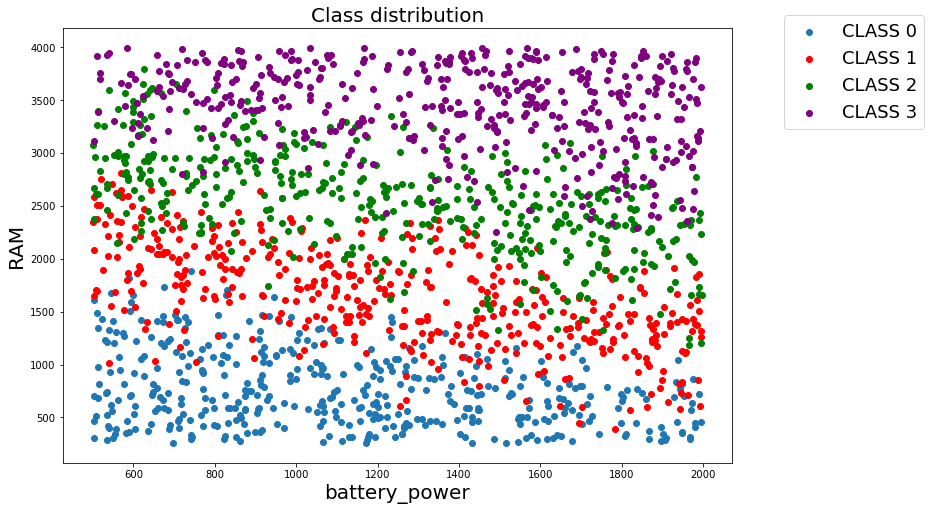

In [12]:
plt.figure(figsize=(12,8))
plt.title('Class distribution',fontsize=20)
plt.scatter(a['battery_power'],a['ram'])
plt.scatter(b['battery_power'],b['ram'],color='red')
plt.scatter(c['battery_power'],c['ram'],color='green')
plt.scatter(d['battery_power'],d['ram'],color='purple')
plt.xlabel('battery_power',fontsize=20)
plt.ylabel('RAM',fontsize=20)
plt.legend(['CLASS 0','CLASS 1','CLASS 2','CLASS 3'],bbox_to_anchor=(1.3,1.05 ),fontsize=18,loc='best')
plt.show()

In [ ]:
as you can see we can use linear kernel for svm algorithm

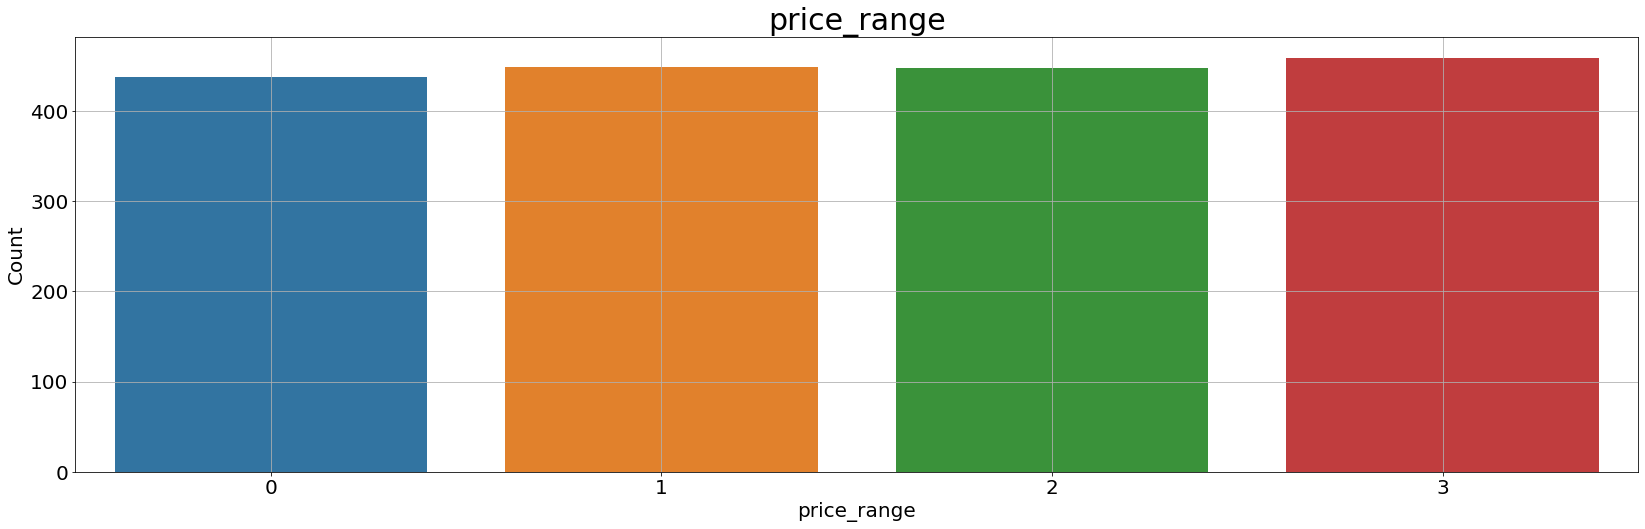

In [14]:
#a balance data
plt.figure(figsize=(28,8))
ax = sns.countplot(x="price_range", data=df_mobile)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("price_range",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("price_range",fontsize=30)
plt.grid()

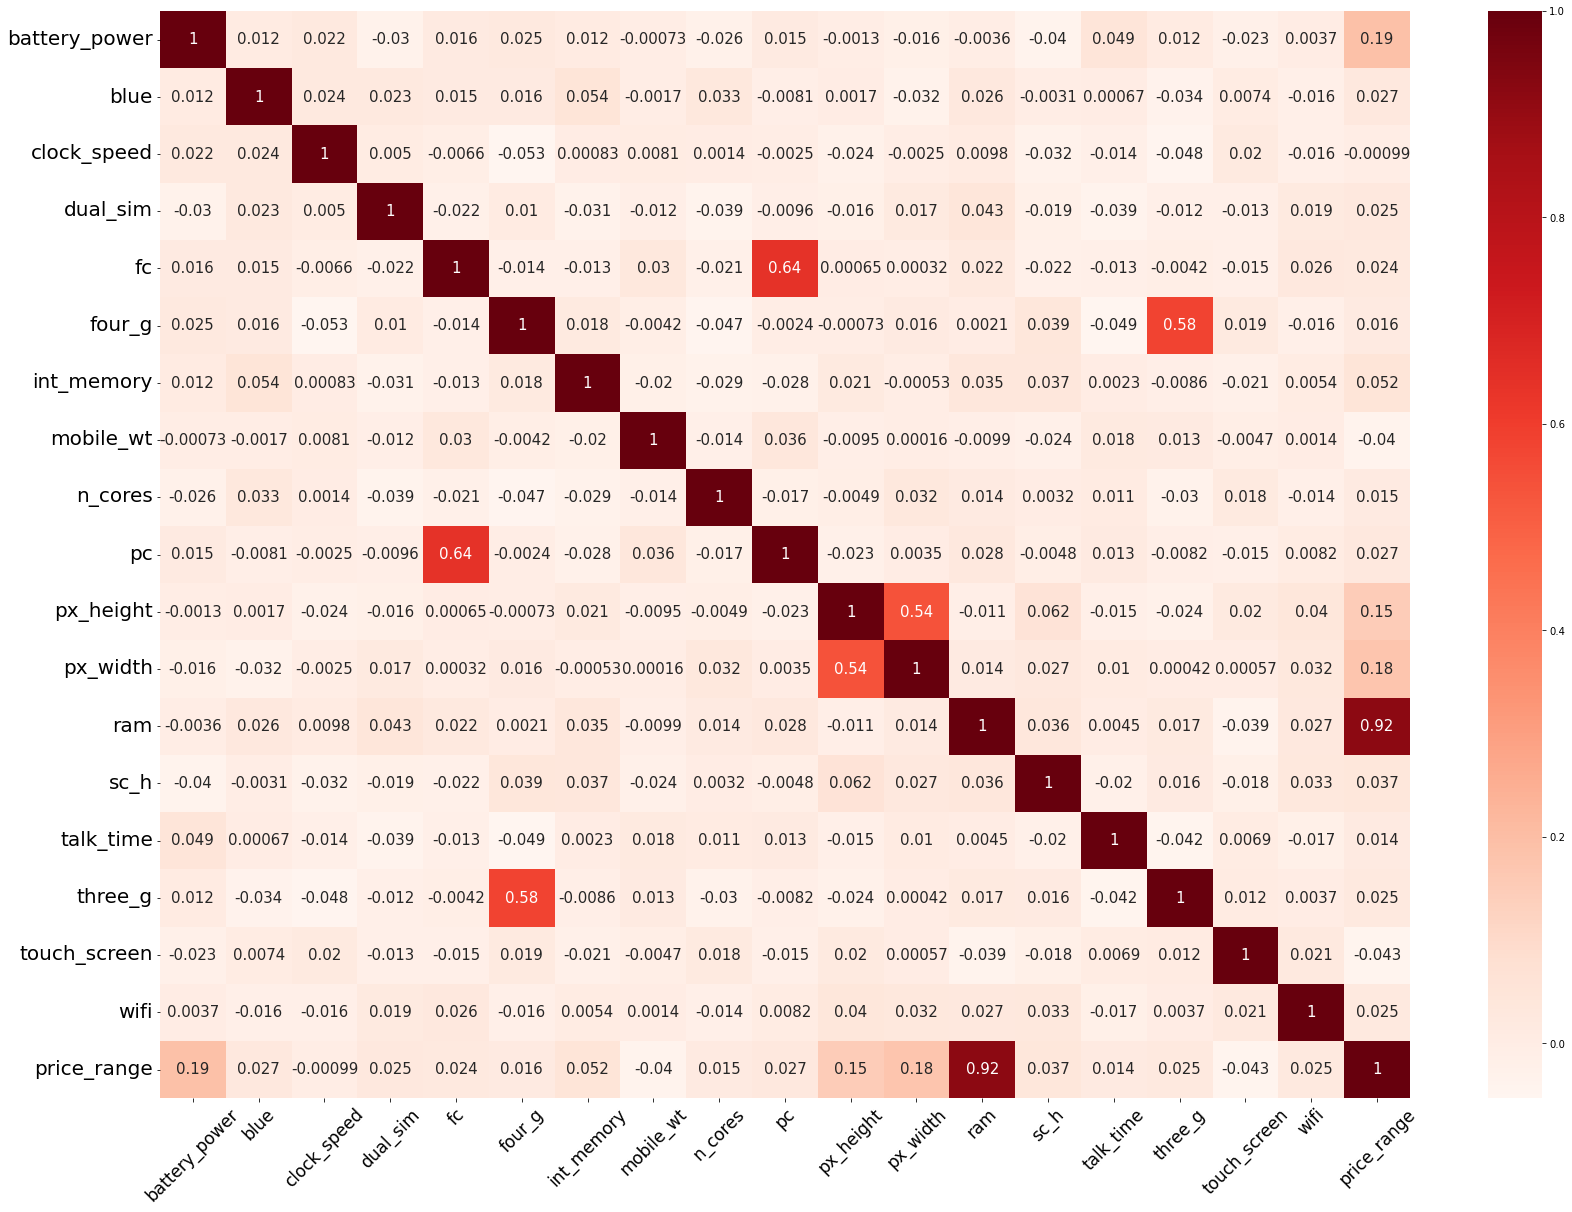

In [16]:
#corrolation table
plt.figure(figsize=(28,20))
cor = df_mobile.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,annot_kws={"size": 15})
plt.yticks(rotation=0,fontsize=20)
plt.xticks(fontsize=17,rotation=45)
plt.show()

In [16]:
#LETS MAKE A MODEL!
df_mobile2=df_mobile.drop(['price_range'],axis=1)
df_mobile2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi
0,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,7,1,1,0
1,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,9,1,1,0
2,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,11,1,0,0
3,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,15,1,1,0
4,1859,0,0.5,1,3,0,22,164,1,7,1004,1654,1067,17,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,19,1,1,0
1789,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,16,1,1,1
1790,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,5,1,1,0
1791,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,19,1,1,1


In [17]:
df_mobile2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi
0,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,7,1,1,0
1,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,9,1,1,0
2,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,11,1,0,0
3,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,15,1,1,0
4,1859,0,0.5,1,3,0,22,164,1,7,1004,1654,1067,17,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,19,1,1,0
1789,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,16,1,1,1
1790,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,5,1,1,0
1791,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,19,1,1,1


In [18]:
x=pd.DataFrame(df_mobile2).values

In [19]:
y=df_mobile.price_range.values.reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
model_dts = DecisionTreeClassifier(random_state=0)
model_rf = RandomForestClassifier(random_state=0)
model_svm=SVC(random_state=0,decision_function_shape='ovo',C=1,kernel='linear')#i choose this hyperparametr by using grid search.
model_svm_roc=SVC(random_state=0,decision_function_shape='ovo',probability=True)# for drawing roc plot

In [22]:
#notice:svm alghorithm is not recomended for a multiclass data.but with function_shape methode we can use this alghorithm.

In [23]:
model_dts.fit(x_train, y_train.ravel())
model_rf.fit(x_train, y_train.ravel())
model_svm_roc.fit(x_train, y_train.ravel())
model_svm.fit(x_train, y_train.ravel())

SVC(C=1, decision_function_shape='ovo', kernel='linear', random_state=0)

In [24]:
#for modeling
y_pred_dts = model_dts.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_svm = model_svm.predict(x_test)
#for draw auc curve.
y_pred_svm_roc = model_svm_roc.predict_proba(x_test)
y_pred_dts_proba=model_dts.predict_proba(x_test)
y_pred_rf_proba=model_rf.predict_proba(x_test)

In [25]:
print('Accuracy for DTS:',metrics.accuracy_score(y_test,y_pred_dts))
print('F1_SCORE for DTS:',metrics.f1_score(y_test,y_pred_dts,average='micro'))
print('Accuracy for RF:',metrics.accuracy_score(y_test,y_pred_rf))
print('F1_SCORE for RF:',metrics.f1_score(y_test,y_pred_rf,average='micro'))
print('Accuracy for SVM:',metrics.accuracy_score(y_test,y_pred_svm))
print('F1_SCORE for SVM:',metrics.f1_score(y_test,y_pred_svm,average='micro'))


Accuracy for DTS: 0.841225626740947
F1_SCORE for DTS: 0.841225626740947
Accuracy for RF: 0.871866295264624
F1_SCORE for RF: 0.871866295264624
Accuracy for SVM: 0.9721448467966574
F1_SCORE for SVM: 0.9721448467966572


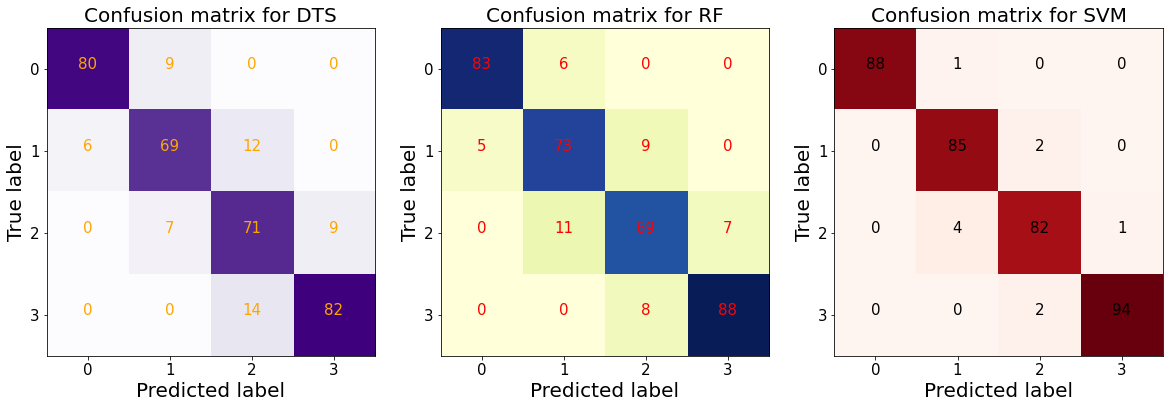

In [26]:
#Confusion matrix
#for DTS
fig,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(20,8))
def plot_confusion_matrix(cm, classes=['Cheap', 'Expensive','Very expensive'],
                          normalize=False,
                          title='Confusion matrix for DTS',
                          cmap=plt.cm.Purples):
    import itertools
    ax0.imshow(cm, interpolation='nearest', cmap=cmap)
    ax0.set_title(title,fontsize=20)
    tick_marks = np.arange(len(classes))
    ax0.set_xticks(tick_marks)
    ax0.set_yticks(tick_marks)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax0.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=15,
                 color="orange")
    ax0.set_ylabel('True label',fontsize=20)
    ax0.set_xlabel('Predicted label',fontsize=20)
    
cnf_matrix = confusion_matrix(y_test, y_pred_dts)
np.set_printoptions(precision=2)
ax0.grid(False)
plot_confusion_matrix(cnf_matrix, classes=['Cheap', 'Medium', 'Expensive','Very expensive'],)

#for RF
def plot_confusion_matrix(cm, classes=['Cheap', 'Expensive','Very expensive'],
                          normalize=False,
                          title='Confusion matrix for RF',
                          cmap=plt.cm.YlGnBu):
    import itertools
    ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    ax1.set_title(title,fontsize=20)
    tick_marks = np.arange(len(classes))
    ax1.set_xticks(tick_marks)
    ax1.set_yticks(tick_marks)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax1.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=15,
                 color="red")
    ax1.set_ylabel('True label',fontsize=20)
    ax1.set_xlabel('Predicted label',fontsize=20)
    
cnf_matrix = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)
ax1.grid(False)
plot_confusion_matrix(cnf_matrix, classes=['Cheap', 'Medium', 'Expensive','Very expensive'],)
        
        

#for SVM
def plot_confusion_matrix(cm, classes=['Cheap', 'Expensive','Very expensive'],
                          normalize=False,
                          title='Confusion matrix for SVM',
                          cmap=plt.cm.Reds):
    import itertools
    ax2.imshow(cm, interpolation='nearest', cmap=cmap)
    ax2.set_title(title,fontsize=20)
    tick_marks = np.arange(len(classes))
    ax2.set_xticks(tick_marks)
    ax2.set_yticks(tick_marks)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax2.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=15,
                 color="black")
    ax2.set_ylabel('True label',fontsize=20)
    ax2.set_xlabel('Predicted label',fontsize=20)
    
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
np.set_printoptions(precision=2)
ax2.grid(False)
plot_confusion_matrix(cnf_matrix, classes=['Cheap', 'Medium', 'Expensive','Very expensive'],)
        

ax0.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.show()

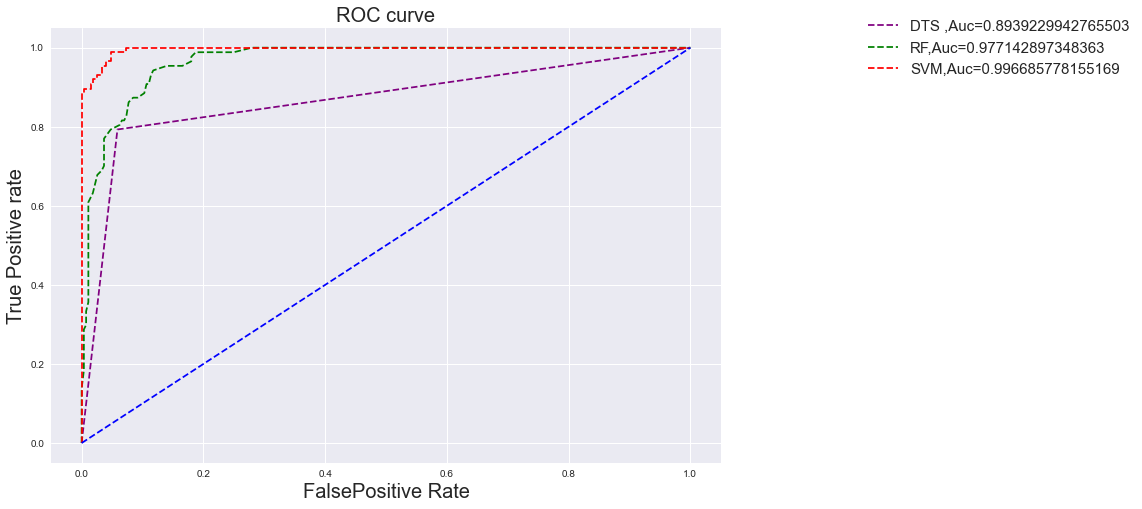

In [27]:
#AUC CURVE
plt.figure(figsize=(12,8))
fpr_dts, tpr_dts, thresh_dts = roc_curve(y_test, y_pred_dts_proba[:,1], pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, y_pred_rf_proba[:,1], pos_label=1)
fpr_svm, tpr_svm, thresh_svm = roc_curve(y_test, y_pred_svm_roc[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score_dts = roc_auc_score(y_test, y_pred_dts_proba,multi_class='ovr')
auc_score_rf = roc_auc_score(y_test, y_pred_rf_proba,multi_class='ovr')
auc_score_svm = roc_auc_score(y_test, y_pred_svm_roc,multi_class='ovr')

auc_dts = metrics.roc_auc_score(y_test, y_pred_dts_proba,multi_class='ovr')
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba,multi_class='ovr')
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_roc,multi_class='ovr')

plt.style.use('seaborn')
plt.plot(fpr_dts, tpr_dts, linestyle='--',color='purple', label='DTS ,Auc='+str(auc_dts))
plt.plot(fpr_rf,tpr_rf, linestyle='--',color='green', label='RF,Auc='+str(auc_rf))
plt.plot(fpr_svm,tpr_svm, linestyle='--',color='red', label='SVM,Auc='+str(auc_svm))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve',fontsize=20)
plt.xlabel('FalsePositive Rate',fontsize=20)
plt.ylabel('True Positive rate',fontsize=20)
plt.legend(bbox_to_anchor=(1.2,1.05 ),loc='best',fontsize=15)
plt.show()

In [28]:
#SO,THE SVM IS PERFECT!

In [29]:
compare=pd.DataFrame({'actual':y_test.flatten(),'predic':y_pred_svm.flatten()})
compare

,actual,predic
0,0,0
1,2,2
2,2,2
3,1,1
4,0,0
...,...,...
354,3,3
355,2,2
356,0,0
357,1,1


In [30]:
df_mobile2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi
0,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,7,1,1,0
1,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,9,1,1,0
2,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,11,1,0,0
3,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,15,1,1,0
4,1859,0,0.5,1,3,0,22,164,1,7,1004,1654,1067,17,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,19,1,1,0
1789,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,16,1,1,1
1790,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,5,1,1,0
1791,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,19,1,1,1


In [31]:
data_test.drop(['m_dep','sc_w'],axis=1,inplace=True)#DROP UNnecesery features.

In [32]:
#put both train and test data in a dataframe and predict test data with train data.
df_mobile_final=df_mobile2.append(data_test)
df_mobile_final.reset_index(inplace=True,drop=True)
df_mobile_final

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi
0,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,7,1,1,0
1,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,9,1,1,0
2,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,11,1,0,0
3,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,15,1,1,0
4,1859,0,0.5,1,3,0,22,164,1,7,1004,1654,1067,17,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,15,1,1,0
2789,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,19,0,1,1
2790,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,14,1,0,0
2791,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,6,0,1,0


In [33]:
train=df_mobile_final.iloc[:1793]
test=df_mobile_final.iloc[1793:]

In [34]:
#learn from mobile_train and pred on test_train
x_train=df_mobile_final[['battery_power','blue','clock_speed','dual_sim','four_g','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','talk_time','three_g','touch_screen','wifi']][:1793]
y_train=df_mobile[['price_range']][:1793].values.reshape(-1,1)

In [35]:
x_test=df_mobile_final[['battery_power','blue','clock_speed','dual_sim','four_g','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','talk_time','three_g','touch_screen','wifi']][1793:]

In [36]:
model_svm.fit(x_train, y_train.ravel())

SVC(C=1, decision_function_shape='ovo', kernel='linear', random_state=0)

In [37]:
y_pred_svm=model_svm.predict(x_test)
y_pred_final=pd.DataFrame(y_pred_svm)
#add final answer as a column to data_test
data_test['pred_price']=y_pred_final

In [38]:
#answer
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,pred_price
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,2,0,1,0,3
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,15,1,1,0,2
996,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,6,0,1,0,2


analys
Based on the above, it can be concluded that unfortunately this vendor does not have enough knowledge about mobile hardware and the impact of each of them on performance and therefore the final price of mobile phones, and only based on RAM and relatively The amount of battery charge has done the pricing, which is not suitable for either the customer or the seller. And very important features such as: number of processors, mobile resolution, internal memory, etc. were almost ignored for pricing, so As a data scientist, my suggestion is that the seller first understands the value and importance of each feature to the performance of the mobile phone and re-pricing from scratch.